<h3>6.1.4: Create Latitude and Longitude Combinations</h3>

In [31]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the time module.
import time

# TO MAKE AN API CALL
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [32]:
# create arrays of latitudes and longitudes with size of 1500, and declare each array as a variable
# pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

<p>The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple.</p>


In [33]:
# unpack our lat_lngs zip object into a list.
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [34]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [35]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

580


<h3>6.2.6: Get the City Weather Data</h3>
<h4>Import Dependencies, and Initialize an Empty List and Counters</h4>
<p>Before adding new code, make sure the following tasks are completed:
<ul>
    <li>Import your Requests Library and the weather_api_key.</li>
    <li>Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.</li>
</ul>

*** SEE LINE 1 on Import Dependencies ***

<h4>Handle API Request Errors with try-except Blocks</h4>

In [36]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop Through the List of Cities and Build the City URL
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
        
    # Create endpoint URL with each city.
#    city_url = url + "&q=" + "i"
    
    
# Instead of using two for loops, we can use the enumerate() method as an alternative way 
# to iterate through the list of cities and retrieve both the index, and the city from the list.
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | stavrovo
Processing Record 4 of Set 1 | pisco
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | cochrane
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | samarai
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | axim
Processing Record 12 of Set 1 | jurm
Processing Record 13 of Set 1 | port lincoln
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | nara
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | ponta do sol
Processing Record 20 of Set 1 | fukue
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | cabo san lucas
Processing Record 23 of Set 1 | mitsamiouli
Processing

Processing Record 36 of Set 4 | wasilla
Processing Record 37 of Set 4 | iberia
Processing Record 38 of Set 4 | camacha
Processing Record 39 of Set 4 | ihosy
Processing Record 40 of Set 4 | consuegra
Processing Record 41 of Set 4 | cayenne
Processing Record 42 of Set 4 | hualmay
Processing Record 43 of Set 4 | severo-kurilsk
Processing Record 44 of Set 4 | shahrud
Processing Record 45 of Set 4 | esperance
Processing Record 46 of Set 4 | tautira
Processing Record 47 of Set 4 | christchurch
Processing Record 48 of Set 4 | maykain
City not found. Skipping...
Processing Record 49 of Set 4 | lasa
Processing Record 50 of Set 4 | quevedo
Processing Record 1 of Set 5 | nogliki
Processing Record 2 of Set 5 | imbituba
Processing Record 3 of Set 5 | kahului
Processing Record 4 of Set 5 | regeneracao
Processing Record 5 of Set 5 | longyearbyen
Processing Record 6 of Set 5 | les cayes
Processing Record 7 of Set 5 | bilibino
Processing Record 8 of Set 5 | kruisfontein
Processing Record 9 of Set 5 | q

Processing Record 27 of Set 8 | albert lea
Processing Record 28 of Set 8 | ituango
Processing Record 29 of Set 8 | sorong
Processing Record 30 of Set 8 | turukhansk
Processing Record 31 of Set 8 | nanga eboko
Processing Record 32 of Set 8 | amambai
Processing Record 33 of Set 8 | havelock
Processing Record 34 of Set 8 | san juan
Processing Record 35 of Set 8 | lagunas
Processing Record 36 of Set 8 | los llanos de aridane
Processing Record 37 of Set 8 | oeiras do para
Processing Record 38 of Set 8 | cervo
Processing Record 39 of Set 8 | tecoanapa
Processing Record 40 of Set 8 | tura
Processing Record 41 of Set 8 | mayabon
Processing Record 42 of Set 8 | jinchang
Processing Record 43 of Set 8 | honiara
Processing Record 44 of Set 8 | hammerfest
Processing Record 45 of Set 8 | ambulu
Processing Record 46 of Set 8 | victoria
Processing Record 47 of Set 8 | mandi bahauddin
Processing Record 48 of Set 8 | waingapu
Processing Record 49 of Set 8 | yanchukan
City not found. Skipping...
Processi

Processing Record 15 of Set 12 | dryden
Processing Record 16 of Set 12 | yarmouth
Processing Record 17 of Set 12 | klyuchi
Processing Record 18 of Set 12 | byron bay
Processing Record 19 of Set 12 | asau
Processing Record 20 of Set 12 | chara
Processing Record 21 of Set 12 | oranjemund
Processing Record 22 of Set 12 | oswego
Processing Record 23 of Set 12 | sabha
Processing Record 24 of Set 12 | auki
Processing Record 25 of Set 12 | minusinsk
Processing Record 26 of Set 12 | rio cuarto
Processing Record 27 of Set 12 | inta
Processing Record 28 of Set 12 | krasne
Processing Record 29 of Set 12 | porbandar
Processing Record 30 of Set 12 | hvammstangi
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [37]:
len(city_data)

534


<h3>6.2.7: Create a DataFrame of City Weather Data</h3>
<p>To convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries).</p>

In [38]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,55.00,78,0,0.56,ZA,2020-10-20 19:30:13
1,Saskylakh,71.92,114.08,20.88,97,99,7.56,RU,2020-10-20 19:30:13
2,Stavrovo,56.13,40.01,32.34,96,15,10.11,RU,2020-10-20 19:30:13
3,Pisco,-13.70,-76.22,69.01,72,20,9.17,PE,2020-10-20 19:30:13
4,Butaritari,3.07,172.79,81.77,76,97,12.03,KI,2020-10-20 19:30:14
5,Cochrane,51.18,-114.47,33.01,68,1,12.75,CA,2020-10-20 19:27:31
6,Kodiak,57.79,-152.41,44.60,52,1,9.17,US,2020-10-20 19:30:14
7,Mataura,-46.19,168.86,45.00,90,65,4.00,NZ,2020-10-20 19:30:14
8,Samarai,-10.62,150.67,78.76,86,100,8.41,PG,2020-10-20 19:30:15
9,Ilulissat,69.22,-51.10,41.00,65,75,9.17,GL,2020-10-20 19:29:58


<p>Next, reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read</p>

In [39]:
new_column_reorder = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [40]:
# assign a new or the same DataFrame with new column order
new_city_data_df = city_data_df[new_column_reorder]
new_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2020-10-20 19:30:13,-34.42,19.23,55.00,78,0,0.56
1,Saskylakh,RU,2020-10-20 19:30:13,71.92,114.08,20.88,97,99,7.56
2,Stavrovo,RU,2020-10-20 19:30:13,56.13,40.01,32.34,96,15,10.11
3,Pisco,PE,2020-10-20 19:30:13,-13.70,-76.22,69.01,72,20,9.17
4,Butaritari,KI,2020-10-20 19:30:14,3.07,172.79,81.77,76,97,12.03
5,Cochrane,CA,2020-10-20 19:27:31,51.18,-114.47,33.01,68,1,12.75
6,Kodiak,US,2020-10-20 19:30:14,57.79,-152.41,44.60,52,1,9.17
7,Mataura,NZ,2020-10-20 19:30:14,-46.19,168.86,45.00,90,65,4.00
8,Samarai,PG,2020-10-20 19:30:15,-10.62,150.67,78.76,86,100,8.41
9,Ilulissat,GL,2020-10-20 19:29:58,69.22,-51.10,41.00,65,75,9.17


In [41]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
new_city_data_df.to_csv(output_data_file, index_label="City_ID")


<h3>6.3.1: Plot Latitude vs. Temperature</h3>
<p>Create a series of scatter plots for each weather parameter against the latitude for all the cities.</p>
<p>Create scatter plots for latitude vs. maximum temperature, humidity, cloudiness, and wind speed.</p>

<h4>Get Data for Plotting</h4>

In [42]:
# need latitude, maximum temperature, humidity, cloudiness, and wind speed from all the cities.
# Extract relevant fields from the DataFrame for plotting.
lats = new_city_data_df["Lat"]
max_temps = new_city_data_df["Max Temp"]
humidity = new_city_data_df["Humidity"]
cloudiness = new_city_data_df["Cloudiness"]
wind_speed = new_city_data_df["Wind Speed"]

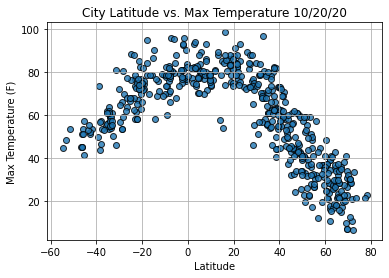

In [43]:

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

<h3>6.3.2: Plot Latitude vs. Humidity</h3>

* create a scatter plot that compares the latitude vs. the humidity.
* change the title to "Humidity," and the y-axis label to "Humidity (%)."

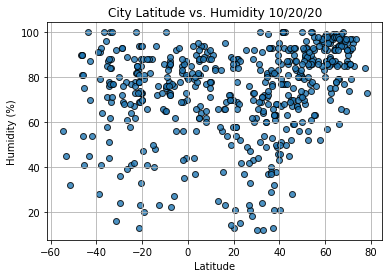

In [44]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


<h3>6.3.3: Plot Latitude vs. Cloudiness</h3>

<p>Refactor the code for our scatter plots by changing the y-axis variable to "cloudiness," the title to "Cloudiness (%)," and the y-axis label to "Cloudiness (%)."</p>

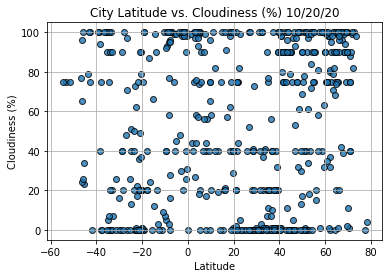

In [45]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


<h3>6.3.4: Plot Latitude vs. Wind Speed</h3>
<p>Repurpose the code and change the y-axis variable to "wind speed," the title to "Wind Speed," and the y-axis label to "Wind Speed (mph)."</p>

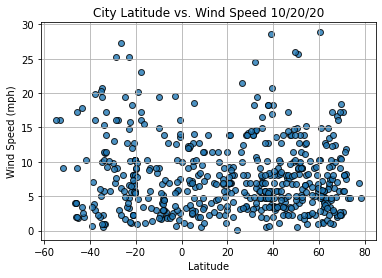

In [46]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


<h3>6.4.2: Find the Correlation Between Latitude and Maximum Temperature</h3>
<p>Using the data from the Northern and Southern Hemispheres: perform linear regression on all four weather parameters: maximum temperature, humidity, cloudiness, and wind speed.</p>

<p>algorithm that performs the linear regression; </p>
<ul>
    <li>returns the equation of the regression line, </li>
    <li>and correlation coefficient, and p value; </li>
    </li>and adds the regression line to a scatter plot of city weather data.</li></ul>
<p>Need to mport linear regression from the SciPy stats module.</p>
from scipy.stats import linregress

In [47]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

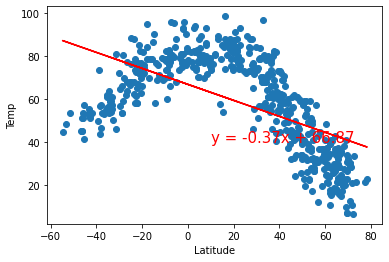

In [48]:
# Perform linear regression. (x_values = lats, y_values = max_temps)
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,max_temps)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()



<h4>Create a Linear Regression Function</h4>
<p>In our function, we have four parameters: x_values, y_values, y_label, and text_coordinates, and we will add a fifth parameter for the title, called, title.</p>

In [61]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.title(title)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

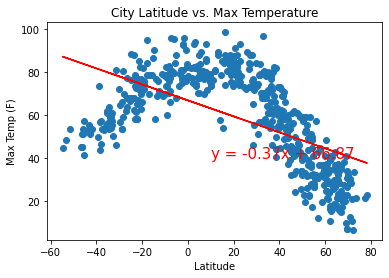

In [63]:
# call the function for latitude vs max temp
plot_linear_regression(lats, max_temps, "City Latitude vs. Max Temperature", "Max Temp (F)", (10,40))


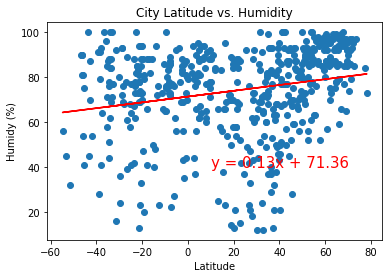

In [62]:

# call the function for latitude vs humidity
plot_linear_regression(lats, humidity, "City Latitude vs. Humidity", "Humidy (%)", (10,40))


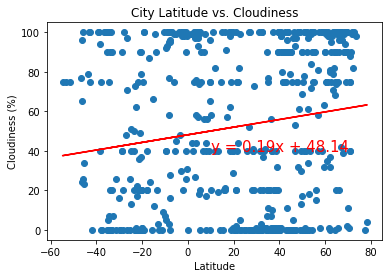

In [64]:

# call the function for latitude vs cloudiness
plot_linear_regression(lats, cloudiness, "City Latitude vs. Cloudiness", "Cloudiness (%)", (10,40))


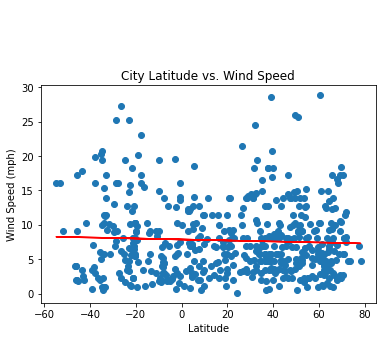

In [66]:
# call the function for latitude vs wind speed
plot_linear_regression(lats, wind_speed, "City Latitude vs. Wind Speed", "Wind Speed (mph)", (10,40))


<h4>Create the Hemisphere DataFrames</h4>
<p>To perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres. To do this, we will need to create Northern Hemisphere DataFrames from the city_data_df DataFrame.</p>
<p>To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame.</p>
<p>The syntax to get a specific row from a current DataFrame is row = df.loc[row_index].</p>

In [54]:
# get a specific row from a current DataFrame 
index13 = new_city_data_df.loc[13]
index13


City                      Rikitea
Country                        PF
Date          2020-10-20 19:30:16
Lat                        -23.12
Lng                       -134.97
Max Temp                    73.45
Humidity                       78
Cloudiness                      0
Wind Speed                  14.81
Name: 13, dtype: object

In [55]:
# filter a DataFrame based on a value of a row.
# example: 
# to get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0, 
# we can filter the city_data_df DataFrame using the code new_city_data_df["Lat"] >= 0
new_city_data_df["Lat"] >= 0


0      False
1       True
2       True
3      False
4       True
       ...  
529     True
530    False
531     True
532     True
533     True
Name: Lat, Length: 534, dtype: bool

In [67]:
# to return a DataFrame with all data fitting the criteria, 
# for latitudes greater than or equal to 0, use the loc method on the city_data_df DataFrame
new_city_data_df.loc[(new_city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Saskylakh,RU,2020-10-20 19:30:13,71.92,114.08,20.88,97,99,7.56
2,Stavrovo,RU,2020-10-20 19:30:13,56.13,40.01,32.34,96,15,10.11
4,Butaritari,KI,2020-10-20 19:30:14,3.07,172.79,81.77,76,97,12.03
5,Cochrane,CA,2020-10-20 19:27:31,51.18,-114.47,33.01,68,1,12.75
6,Kodiak,US,2020-10-20 19:30:14,57.79,-152.41,44.60,52,1,9.17


In [70]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = new_city_data_df.loc[(new_city_data_df["Lat"] >= 0)]
southern_hemi_df = new_city_data_df.loc[(new_city_data_df["Lat"] < 0)]


<h4>Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere</h4>

<p>To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values. Set the x values equal to the latitude column and the y values equal to the maximum temperature column from the northern_hemi_df DataFrame.</p>

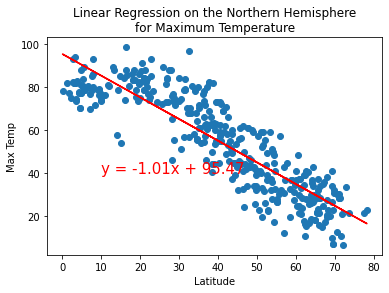

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere\nfor Maximum Temperature", "Max Temp",(10,40))

<h4>Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere</h4>

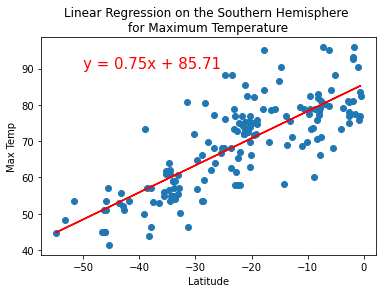

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))


<h3>6.4.3: Find the Correlation Between Latitude and Percent Humidity</h3>
<h4>Perform Linear Regression on the Percent Humidity for the Northern Hemisphere</h4>
<p>To perform the linear regression on the percent humidity for the Northern Hemisphere, set the x-value equal to the latitude column and y-value equal to the Humidity column from the northern_hemi_df DataFrame.</p>

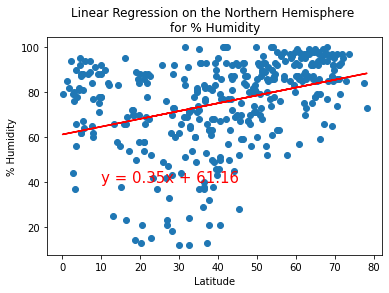

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(10,40))


<h4>Perform Linear Regression on the Percent Humidity for the Southern Hemisphere</h4>

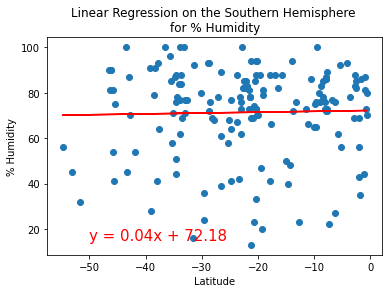

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))


<h3>6.4.4: Find the Correlation Between Latitude and Percent Cloudiness</h3>
<p>This time we'll get the data for the percent cloudiness for the Northern and Southern Hemispheres.</p>
<h4>Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere</h4>

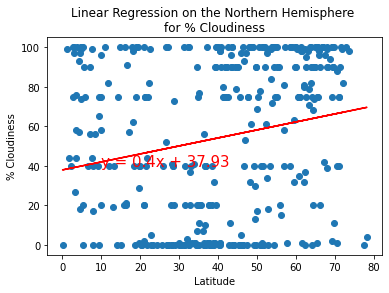

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,40))


<h4>Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere</h4>

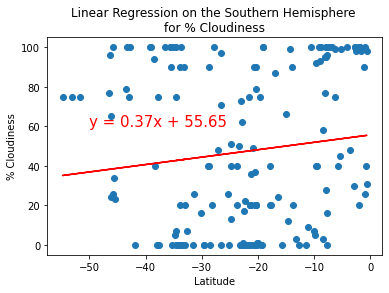

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))


<h3>Find the Correlation Between Latitude and Wind Speed</h3>
<h4>Perform Linear Regression on the Wind Speed for the Northern Hemisphere</h4>
<p>Call the plot_linear_regression function, with the x-value equal to the Latitude column and the y-value equal to the Wind Speed column from the northern_hemi_df DataFrame.</p>

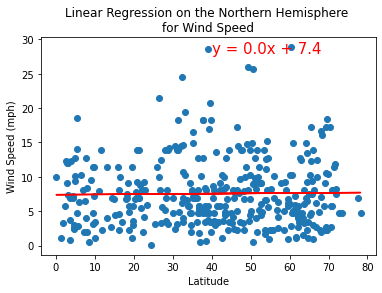

In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)',(40,28))

<h4>Perform Linear Regression on the Wind Speed for the Southern Hemisphere</h4>

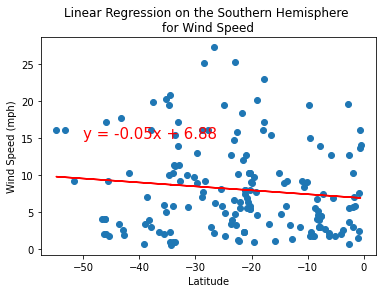

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)',(-50,15))